In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.optimize import minimize
from scipy.stats import norm

In [25]:
data = pd.read_excel("./PreciosPortf.xlsx", index_col=0)
data.head()

,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity
DATE,,,,,
2016-01-01,243.89,94.99,177.22,43.49,72.34
2016-01-04,238.29,91.79,175.90,42.84,72.98
2016-01-05,233.03,91.72,176.45,42.66,71.48
2016-01-06,231.97,91.63,172.68,42.38,70.94
2016-01-07,230.71,89.54,172.94,39.99,72.31


In [26]:
def port_rend(weights, r):
    E_p =(r.mean() @ weights) * 252
    return E_p
def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() *252) @ weights)
    return S_p
def sum_weights(weights):
    return weights.sum() -1 # == 0

def rend_esperado(w, E):
    return port_rend(w, rend) - E # == 0

In [27]:
rend = data.pct_change().dropna()
rend_ports = rend.mean() * 252
rend_ports

ASURB MF Equity       0.123539
GFNORTEO MF Equity    0.078811
PE&OLES* MF Equity    0.111053
WALMEX* MF Equity     0.082426
IENOVA* MF Equity     0.078997
dtype: float64

In [28]:
rmin = rend_ports.min()
rmax = rend_ports.max()
rend_maxs = np.linspace(rmin,rmax)

In [29]:
pesos_optimos = []
for e in rend_maxs:
    constraints = [
        {"type":"eq", "fun":sum_weights},
        {"type":"eq", "fun":lambda w: rend_esperado(w, e)}
    ]
    port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

In [30]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w,rend))
    v_opt.append(port_vol(w,rend))
    
r_opt = np.array(r_opt)
v_opt = np.array(v_opt)



In [112]:
N, M  = rend.shape
w0 = np.random.randn(M)
rf = 0.06
def min_func_sharpe(weights):
        return - (port_rend(weights, rend) - rf)/ port_vol(weights,rend)

constraints = [
    {"type":"eq", "fun":sum_weights}
]
f_sharpe = minimize(min_func_sharpe,w0, constraints=constraints)


In [113]:
w_sharpe = f_sharpe.x

In [114]:
w_sharpe

array([ 0.73142217, -0.1399255 ,  0.17620204,  0.16379871,  0.06850257])

In [115]:
e_sharpe = port_rend(w_sharpe, rend)
vol_sharpe = port_vol(w_sharpe, rend)

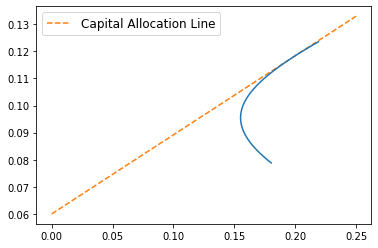

In [116]:
sigma_c = np.linspace(0,0.25)
sharpe = rf + sigma_c*(e_sharpe - rf)/vol_sharpe
plt.plot(sigma_c, sharpe, linestyle="--",c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

# TAREA

VaR a un Dia

VaR anual

al 95% 99% de confianza

efecto de diversificacion

*de acciones individuales

*del portafolio

In [117]:

nivel=.95
des=norm.ppf(nivel)
ds_por=port_vol(w_sharpe, rend)

Var_anual_porf=monto*des*ds_por
Var_diario_port=monto*des*(ds_por/np.sqrt(252))
VaR_diario_individual=sum(monto*w_sharpe*des*np.sqrt(np.diagonal(rend.cov())))
VaR_anual_individual=sum(monto*w_sharpe*des*np.sqrt(np.diagonal(rend.cov()))*np.sqrt(252))
efecto_diver_anual=VaR_anual_individual-Var_anual_porf
efecto_diver_diario=VaR_diario_individual-Var_diario_port

print("PARA UN NIVEL DE %F" %nivel)
print("el VaR diario del portafolio es %F" %Var_diario_port)
print("el VaR anual del portafolio es %F" %Var_anual_porf)
print("el VaR diario individual es %F" %VaR_diario_individual)
print("el VaR anual individual es %F" %VaR_anual_individual)
print("el efecto de diversificacion diario es %F" %efecto_diver_anual)
print("el efecto de diversificacion anual  es %F" %efecto_diver_diario)

PARA UN NIVEL DE 0.950000
el VaR diario del portafolio es 205250.380523
el VaR anual del portafolio es 3258248.780197
el VaR diario individual es 261732.733475
el VaR anual individual es 4154878.336432
el efecto de diversificacion diario es 896629.556235
el efecto de diversificacion anual  es 56482.352951


In [118]:
monto=10_000_000
nivel=.99
des=norm.ppf(nivel)
ds_por=port_vol(w_sharpe, rend)

Var_anual_porf=monto*des*ds_por
Var_diario_port=monto*des*(ds_por/np.sqrt(252))
VaR_diario_individual=sum(monto*w_sharpe*des*np.sqrt(np.diagonal(rend.cov())))
VaR_anual_individual=sum(monto*w_sharpe*des*np.sqrt(np.diagonal(rend.cov()))*np.sqrt(252))
efecto_diver_anual=VaR_anual_individual-Var_anual_porf
efecto_diver_diario=VaR_diario_individual-Var_diario_port

print("PARA UN NIVEL DE %F" %nivel)
print("el VaR diario del portafolio es %F" %Var_diario_port)
print("el VaR anual del portafolio es %F" %Var_anual_porf)
print("el VaR diario individual es %F" %VaR_diario_individual)
print("el VaR anual individual es %F" %VaR_anual_individual)
print("el efecto de diversificacion diario es %F" %efecto_diver_anual)
print("el efecto de diversificacion anual  es %F" %efecto_diver_diario)

PARA UN NIVEL DE 0.990000
el VaR diario del portafolio es 290289.530055
el VaR anual del portafolio es 4608203.428384
el VaR diario individual es 370173.599710
el VaR anual individual es 5876323.720532
el efecto de diversificacion diario es 1268120.292147
el efecto de diversificacion anual  es 79884.069656
